In [1]:
import numpy as np
import os
import skimage.io as skio
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
indir = "G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project"

# set the filepath
tifs_path = os.path.join(indir, "tifs")

We noticed here that some of the TIFs seem to be importing with an extra channel in addition to RGB. We weren't sure why, so we printed out the images.

In [ ]:
def visualize_channels(image_path):
    img = skio.imread(image_path)
    height, width, channels = img.shape

    if channels != 4:
        print(f"Image {image_path} does not have 4 channels")
        return

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    channel_names = ['Red', 'Green', 'Blue', 'Extra']

    for i in range(4):
        axs[i].imshow(img[:, :, i], cmap='gray')
        axs[i].set_title(f'{channel_names[i]} Channel')
        axs[i].axis('off')

    plt.show()

for file in os.listdir(tifs_path):
    if file.endswith(".tif"):
        tif_file = os.path.join(tifs_path, file)
        visualize_channels(tif_file)

We noticed that the extra channel is always black, so we decided to remove it when patching them, since we only need RGB channels.

In [2]:
def extract_and_pad_patches(image, patch_size=(2448, 2448, 3), stride=2448):
    patches = []
    height, width, channels = image.shape

    # If the image has more than 3 channels, extract only the first 3 (assumes RGB)
    if channels > 3:
        image = image[:, :, :3]

    for y in range(0, height, stride):
        for x in range(0, width, stride):
            patch = image[y:y+patch_size[0], x:x+patch_size[1], :]

            # Check if padding is needed
            if patch.shape[0] < patch_size[0] or patch.shape[1] < patch_size[1]:
                pad_height = patch_size[0] - patch.shape[0]
                pad_width = patch_size[1] - patch.shape[1]

                # Pad the patch with zeros (black)
                patch = np.pad(
                    patch,
                    pad_width=((0, pad_height), (0, pad_width), (0, 0)),
                    mode='constant',
                    constant_values=0
                )

            patches.append(patch)

    return patches

In [3]:
from tqdm import tqdm

# create a list of tif file paths
tif_files = [os.path.join(tifs_path, f) for f in os.listdir(tifs_path) if f.endswith(".tif")]

# create empty lists to store the tif files and their patches
tif_list = []
tif_patches_list = []

# loop through all tif files in the list
for tif_file in tqdm(tif_files):
    img = skio.imread(tif_file)

    # Normalize the image data
    img = img.astype(np.float32) / 255.0

    # Append the normalized image to the tif list
    tif_list.append(img)

    # Extract and pad patches from the image and append to the tif patches list
    patches = extract_and_pad_patches(img)
    tif_patches_list.append(np.array(patches))

100%|██████████| 23/23 [01:21<00:00,  3.56s/it]


In [5]:
# Loop through tif_patches_array and print the shape of each array
for i, tif in enumerate(tif_list):
    print(f"TIF {i}: shape = {tif.shape}")

TIF 0: shape = (5100, 6600, 3)
TIF 1: shape = (5100, 6600, 4)
TIF 2: shape = (5100, 6600, 3)
TIF 3: shape = (5100, 6600, 3)
TIF 4: shape = (5100, 6600, 4)
TIF 5: shape = (5100, 6600, 3)
TIF 6: shape = (5100, 6600, 3)
TIF 7: shape = (24000, 23700, 3)
TIF 8: shape = (5100, 6600, 4)
TIF 9: shape = (5100, 6600, 4)
TIF 10: shape = (5100, 6600, 4)
TIF 11: shape = (5101, 6600, 3)
TIF 12: shape = (5100, 6600, 3)
TIF 13: shape = (5100, 6600, 3)
TIF 14: shape = (24000, 23700, 3)
TIF 15: shape = (5100, 6600, 3)
TIF 16: shape = (5100, 6600, 4)
TIF 17: shape = (5100, 6600, 3)
TIF 18: shape = (5100, 6600, 3)
TIF 19: shape = (18000, 24000, 4)
TIF 20: shape = (5100, 6600, 3)
TIF 21: shape = (5100, 6600, 4)
TIF 22: shape = (5100, 6600, 3)
TIF 0: shape = (5100, 6600, 3)
TIF 1: shape = (5100, 6600, 4)
TIF 2: shape = (5100, 6600, 3)
TIF 3: shape = (5100, 6600, 3)
TIF 4: shape = (5100, 6600, 4)
TIF 5: shape = (5100, 6600, 3)
TIF 6: shape = (5100, 6600, 3)
TIF 7: shape = (24000, 23700, 3)
TIF 8: shape = (51

In [6]:
# convert each list of patches to a numpy array with progress bar
tif_patches_array = [np.array(patches) for patches in tqdm(tif_patches_list)]

100%|██████████| 23/23 [01:12<00:00,  3.16s/it]


In [7]:
for i in tif_patches_array:
    print(i.shape)

(9, 2448, 2448, 3)
(9, 2448, 2448, 3)
(9, 2448, 2448, 3)
(9, 2448, 2448, 3)
(9, 2448, 2448, 3)
(9, 2448, 2448, 3)
(9, 2448, 2448, 3)
(100, 2448, 2448, 3)
(9, 2448, 2448, 3)
(9, 2448, 2448, 3)
(9, 2448, 2448, 3)
(9, 2448, 2448, 3)
(9, 2448, 2448, 3)
(9, 2448, 2448, 3)
(100, 2448, 2448, 3)
(9, 2448, 2448, 3)
(9, 2448, 2448, 3)
(9, 2448, 2448, 3)
(9, 2448, 2448, 3)
(80, 2448, 2448, 3)
(9, 2448, 2448, 3)
(9, 2448, 2448, 3)
(9, 2448, 2448, 3)


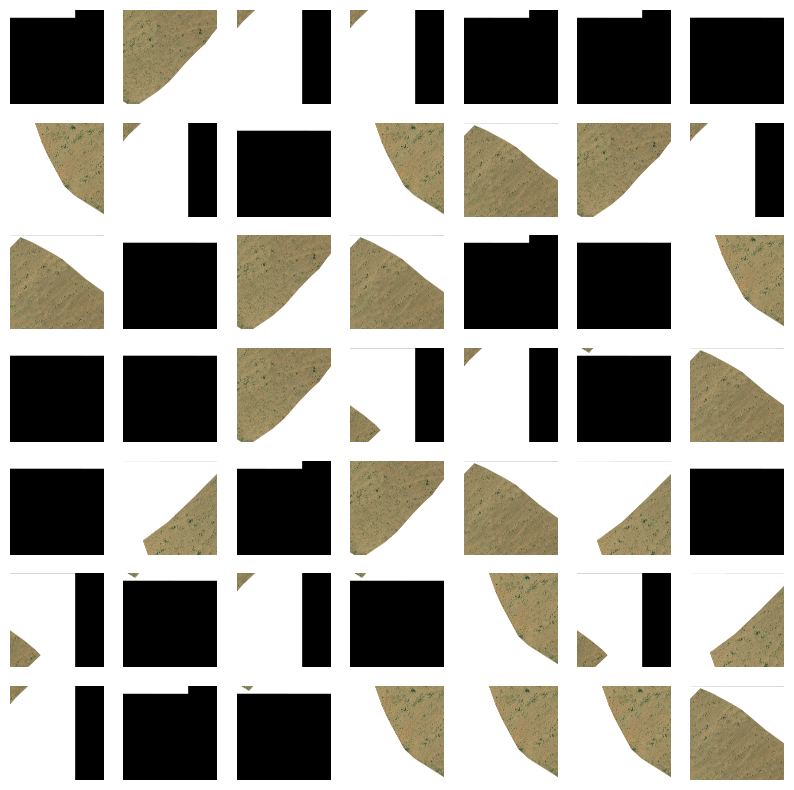

In [8]:
# print 49 random images from tif_patches_array in a 7x7 grid, but with no borders or axes
fig, axes = plt.subplots(7, 7, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(tif_patches_array[0][np.random.randint(0, len(tif_patches_array[0]))])
    ax.axis('off')

In [9]:
# Loop through tif_patches_array and print the shape of each array
for i, patches in enumerate(tif_patches_array):
    print(f"Array {i}: shape = {patches.shape}")

Array 0: shape = (9, 2448, 2448, 3)
Array 1: shape = (9, 2448, 2448, 3)
Array 2: shape = (9, 2448, 2448, 3)
Array 3: shape = (9, 2448, 2448, 3)
Array 4: shape = (9, 2448, 2448, 3)
Array 5: shape = (9, 2448, 2448, 3)
Array 6: shape = (9, 2448, 2448, 3)
Array 7: shape = (100, 2448, 2448, 3)
Array 8: shape = (9, 2448, 2448, 3)
Array 9: shape = (9, 2448, 2448, 3)
Array 10: shape = (9, 2448, 2448, 3)
Array 11: shape = (9, 2448, 2448, 3)
Array 12: shape = (9, 2448, 2448, 3)
Array 13: shape = (9, 2448, 2448, 3)
Array 14: shape = (100, 2448, 2448, 3)
Array 15: shape = (9, 2448, 2448, 3)
Array 16: shape = (9, 2448, 2448, 3)
Array 17: shape = (9, 2448, 2448, 3)
Array 18: shape = (9, 2448, 2448, 3)
Array 19: shape = (80, 2448, 2448, 3)
Array 20: shape = (9, 2448, 2448, 3)
Array 21: shape = (9, 2448, 2448, 3)
Array 22: shape = (9, 2448, 2448, 3)


In [10]:
# Concatenate all of the images in tif_patches_array into a single array
tif_patches_full = np.concatenate(tif_patches_array, axis=0)

In [11]:
tif_patches_full.shape

(460, 2448, 2448, 3)

In [13]:
from tqdm import tqdm

# create a new subfolder called "patches" in the base directory
patches_path = os.path.join(indir, "patches_2448sq")
os.mkdir(patches_path)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\\patches_2448sq'

In [14]:
tqdm(np.save(os.path.join(patches_path, "patches_2448sq"), tif_patches_full))

0it [00:00, ?it/s]